#  Deloitte Hackathon 

Data gathered from http://www.ncdrisc.org/data-downloads.html

In [33]:
import pandas as pd
import numpy as np

In [34]:
blood_pressure = pd.read_csv("../data/United States of America blood pressure.csv", engine='python')
bmi = pd.read_csv("../data/NCD_RisC_Lancet_2017_BMI_age_standardised_United States of America (1).csv", engine='python')
diabetes = pd.read_csv("../data/United States of America diabetes.csv", engine='python')
height = pd.read_csv("../data/United States of America height.csv", engine='python')

In [35]:
blood_cols = [col for col in blood_pressure.columns if col in ['Sex',
                                                               'Year',
                                                               'Age-standardised mean systolic blood pressure (mmHg)']]
bmi_cols = [col for col in bmi.columns if col in ['Sex',
                                                  'Year',
                                                  'Mean BMI']]
diabetes_cols = [col for col in diabetes.columns if col in ['Sex',
                                                            'Year',
                                                            'Age-standardised diabetes prevalence']]
height_cols = [col for col in height.columns if col in ['Sex',
                                                               'Year of birth',
                                                               'Mean height (cm)']]


In [36]:
blood_pressure = blood_pressure[blood_cols]
bmi = bmi[bmi_cols]
diabetes = diabetes[diabetes_cols]
height = height[height_cols]

In [37]:
blood_new_col = [u'sex', u'year', u'average_blood_pressure_mmHg']
bmi_new_col = [u'sex', u'year', u'average_bmi']
diabetes_new_col = [u'sex', u'year', u'average_diabetes']
height_new_col = [u'sex', u'year', u'average_height_cm']

In [38]:
blood_pressure.columns = blood_new_col
bmi.columns = bmi_new_col
diabetes.columns = diabetes_new_col
height.columns = height_new_col

In [39]:
df1 = pd.merge(blood_pressure, bmi, how='left', on=['sex', 'year'])

In [40]:
df2 = pd.merge(df1, diabetes, how='left', on=['sex', 'year'])

In [41]:
df3 = pd.merge(df2, height, how='left', on=['sex', 'year'])

In [42]:
df = df3[['year',
          'sex', 
          'average_blood_pressure_mmHg',
          'average_bmi',
          'average_diabetes',
          'average_height_cm']]

In [43]:
df.dropna(inplace=True)

/Users/jinpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df.head()

,year,sex,average_blood_pressure_mmHg,average_bmi,average_diabetes,average_height_cm,male,female
5,1980,Men,128.402402,25.592312,0.046597,177.531675,1,0
6,1981,Men,127.944534,25.662449,0.047244,177.521189,1,0
7,1982,Men,127.484951,25.737904,0.047964,177.508491,1,0
8,1983,Men,127.032056,25.818297,0.048793,177.492798,1,0
9,1984,Men,126.580242,25.903410,0.049726,177.473892,1,0


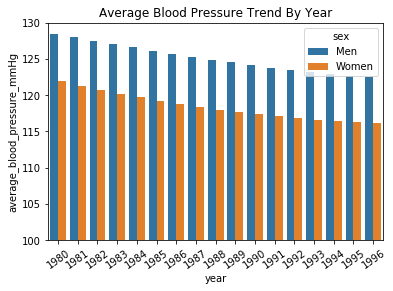

In [46]:
sns.barplot(x=df['year'],
            y=df['average_blood_pressure_mmHg'],
            hue=df['sex']).set(title=f'Average Blood Pressure Trend By Year')
plt.xticks(rotation=35)
plt.ylim(100, 130)
plt.show();

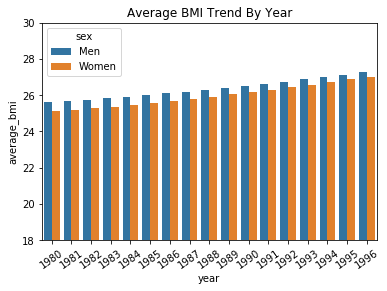

In [47]:
sns.barplot(x=df['year'],
            y=df['average_bmi'],
            hue=df['sex']).set(title=f'Average BMI Trend By Year')
plt.xticks(rotation=35)
plt.ylim(18, 30)
plt.show();

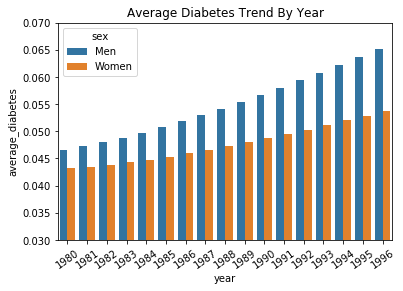

In [48]:
sns.barplot(x=df['year'],
            y=df['average_diabetes'],
            hue=df['sex']).set(title=f'Average Diabetes Trend By Year')
plt.ylim(0.03, 0.07)
plt.xticks(rotation=35)
plt.show();

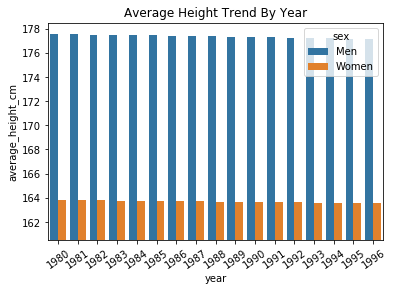

In [49]:
sns.barplot(x=df['year'],
            y=df['average_height_cm'],
            hue=df['sex']).set(title=f'Average Height Trend By Year')
plt.xticks(rotation=35)
plt.ylim(160.50, 178.50)
plt.show();

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 5 to 62
Data columns (total 6 columns):
year                           34 non-null int64
sex                            34 non-null object
average_blood_pressure_mmHg    34 non-null float64
average_bmi                    34 non-null float64
average_diabetes               34 non-null float64
average_height_cm              34 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ KB


In [51]:
df['male'] = [1 if i == 'Men' else 0 for i in df['sex']]
df['female'] = [1 if i == 'Women' else 0 for i in df['sex']]

/Users/jinpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jinpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
df.head()

,year,sex,average_blood_pressure_mmHg,average_bmi,average_diabetes,average_height_cm,male,female
5,1980,Men,128.402402,25.592312,0.046597,177.531675,1,0
6,1981,Men,127.944534,25.662449,0.047244,177.521189,1,0
7,1982,Men,127.484951,25.737904,0.047964,177.508491,1,0
8,1983,Men,127.032056,25.818297,0.048793,177.492798,1,0
9,1984,Men,126.580242,25.903410,0.049726,177.473892,1,0


In [53]:
heatmatp =df[['year',
              'male',
              'female',
              'average_blood_pressure_mmHg',
              'average_bmi',
              'average_diabetes',
              'average_height_cm']]

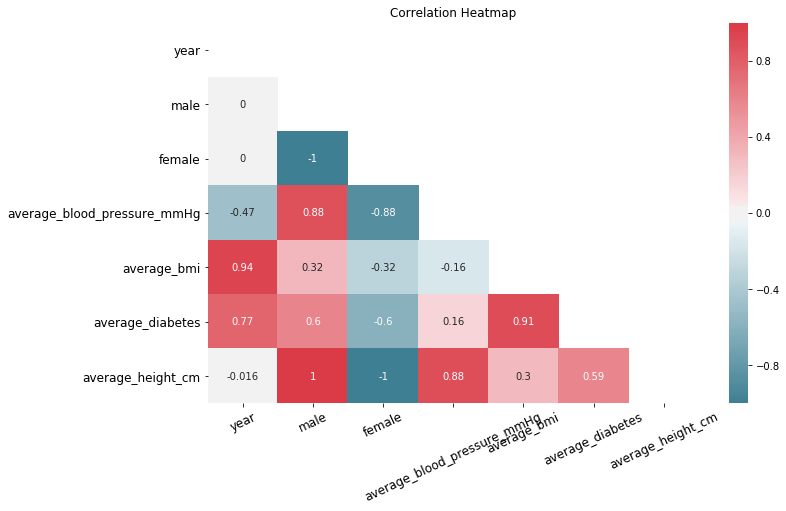

In [55]:
def correlation_heat_map(df):
    corrs = heatmatp.corr()

    fig, ax = plt.subplots(figsize=(11,7))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=25)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    plt.title('Correlation Heatmap')
    
df_with_target = heatmatp
correlation_heat_map(df_with_target)

- Males have positive correlation with bp, bmi, diabetes, height
- Females have negative correlation with bp, bmi, diabetes, height
- diabetes and bmi have strong correlation
- average height have strong correlation with blood pressure
- year and bmi have high correlation

In [136]:
income = pd.read_csv("../data/income2.csv", engine='python')
education = pd.read_csv("../data/education.csv", engine='python')

In [137]:
income.head()

,Unnamed: 0,avg_female_life_expectancy,avg_male_life_expectancy,state
0,0,83.439052,80.917943,AK
1,1,84.394983,79.251347,AL
2,2,84.068003,79.484331,AR
3,3,84.077862,81.193143,AZ
4,4,83.911422,80.806316,CA


In [138]:
education.head()

,stateabbrv,pov_rate,medi_per_enro,per_uninsured,frct_mid_clap25-p75,per_medi_enro_with_at_least_one_pri_care_visit,per_black,per_hisp,unemp_rate,per_chng_in_pop_1980_2000,...,test_score_percentile,high_schl_dropout_rate,percent_college_grads,col_tuition,percent_col_grads,abs_mobility_expected_rank_at_p25,frac_of_children_with_sing_mom,total_crime_rate,local_govt_expenditure,Local_tax_rate
0,AL,0.148726,9952.546667,17.077522,0.484903,83.755935,19.496650,1.983187,0.045197,0.312883,...,-10.352103,0.001664,20.033333,3236.307125,-0.052226,42.470111,0.228163,0.006833,2078.721092,0.014327
1,AR,0.170497,9363.424000,19.415878,0.502598,82.252078,21.447904,2.043490,0.053172,0.204533,...,-5.824634,0.013758,16.790000,2977.303960,-0.099759,41.914842,0.254516,0.010848,1438.899780,0.013538
2,CT,0.075845,8942.330000,10.221514,0.426410,78.550971,8.946201,9.127685,0.031023,0.109721,...,-9.925846,0.007072,32.725000,12240.415125,0.062212,45.400130,0.213428,0.007371,2466.804575,0.027033
3,DE,0.095400,9215.980000,10.758016,0.508115,83.920567,20.129455,4.233707,0.035383,0.273264,...,-1.531314,0.005217,24.050000,4896.133800,0.012088,41.378481,0.244086,0.012971,1785.088800,0.009659
4,GA,0.144810,9399.444091,22.243300,0.471200,80.301227,29.091077,5.791787,0.042889,0.507484,...,-9.415033,0.045750,22.400000,3590.525939,-0.024492,39.379727,0.267996,0.008659,2384.763882,0.023089


In [139]:
education.columns

Index(['stateabbrv', 'pov_rate', 'medi_per_enro', 'per_uninsured',
       'frct_mid_clap25-p75', 'per_medi_enro_with_at_least_one_pri_care_visit',
       'per_black', 'per_hisp', 'unemp_rate', 'per_chng_in_pop_1980_2000',
       'per_chng_in_lab_force_1980_2000', 'lab_force_parti',
       'share_work_in_manu', 'pop_density', 'frac_with_commute_<15_mins',
       'med_household_income', 'med_house_value', 'schl_expend_per_student',
       'student_teacher_ratio', 'test_score_percentile',
       'high_schl_dropout_rate', 'percent_college_grads', 'col_tuition',
       'percent_col_grads', 'abs_mobility_expected_rank_at_p25',
       'frac_of_children_with_sing_mom', 'total_crime_rate',
       'local_govt_expenditure', 'Local_tax_rate'],
      dtype='object')

In [140]:
education_cols = [col for col in education.columns if col in ['stateabbrv',
                                                              'pov_rate',
                                                              'unemp_rate',
                                                              'per_uninsured',
                                                              'percent_college_grads']]

In [141]:
education = education[education_cols]

In [142]:
education.head()

,stateabbrv,pov_rate,per_uninsured,unemp_rate,percent_college_grads
0,AL,0.148726,17.077522,0.045197,20.033333
1,AR,0.170497,19.415878,0.053172,16.790000
2,CT,0.075845,10.221514,0.031023,32.725000
3,DE,0.095400,10.758016,0.035383,24.050000
4,GA,0.144810,22.243300,0.042889,22.400000


In [143]:
education_new_col = [u'state', u'poverty_rate', u'uninsured_rate', u'unemployment_rate', u'college_grad']

In [144]:
education.columns = education_new_col

In [148]:
edu_df = pd.merge(education, income, how='left', on=['state'])

In [154]:
edu_df.reset_index(drop=True,inplace=True)

In [156]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
state                         33 non-null object
poverty_rate                  33 non-null float64
uninsured_rate                33 non-null float64
unemployment_rate             33 non-null float64
college_grad                  33 non-null float64
Unnamed: 0                    33 non-null int64
avg_female_life_expectancy    33 non-null float64
avg_male_life_expectancy      33 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.1+ KB


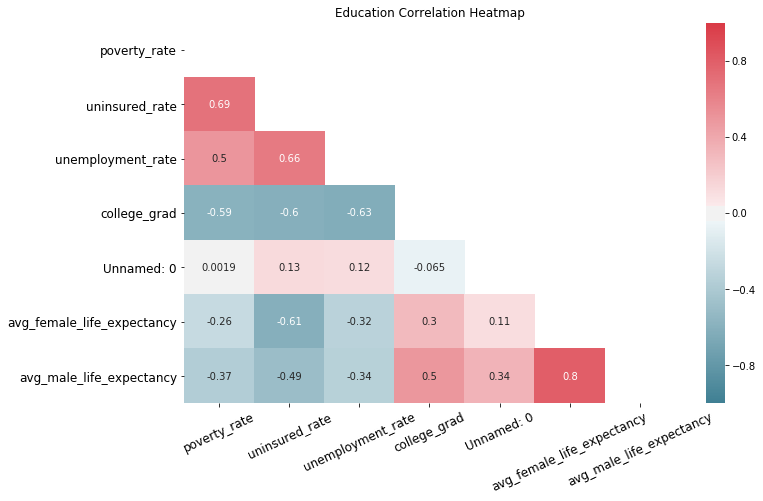

In [158]:
def correlation_heat_map(df):
    corrs = edu_df.corr()

    fig, ax = plt.subplots(figsize=(11,7))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=25)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    plt.title('Education Correlation Heatmap')
    
df_with_target = edu_df
correlation_heat_map(df_with_target)